# THE MNIST DATABASE of handwritten digits

All data came from [MNIST](http://yann.lecun.com/exdb/mnist/)

The MNIST training set is composed of 30,000 patterns from SD-3 and 30,000 patterns from SD-1. Our test set was composed of 5,000 patterns from SD-3 and 5,000 patterns from SD-1. The 60,000 pattern training set contained examples from approximately 250 writers. We made sure that the sets of writers of the training set and test set were disjoint.

SD-1 contains 58,527 digit images written by 500 different writers. In contrast to SD-3, where blocks of data from each writer appeared in sequence, the data in SD-1 is scrambled. Writer identities for SD-1 is available and we used this information to unscramble the writers. We then split SD-1 in two: characters written by the first 250 writers went into our new training set. The remaining 250 writers were placed in our test set. Thus we had two sets with nearly 30,000 examples each. The new training set was completed with enough examples from SD-3, starting at pattern # 0, to make a full set of 60,000 training patterns. Similarly, the new test set was completed with SD-3 examples starting at pattern # 35,000 to make a full set with 60,000 test patterns. Only a subset of 10,000 test images (5,000 from SD-1 and 5,000 from SD-3) is available on this site. The full 60,000 sample training set is available.



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import Dataset.mnistReader as mnist
import random
import NNetWork.Layers as nn
import NNetWork.Variables as uvar
from NNetWork.Util import getBatch
from NNetWork.Optim import Adam

from NNetWork.LossFunc import softMax

trainData = mnist.read_train_data() # 60000 images
taskData = mnist.read_task_data() # 10000 images

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = (20, 20)

# magic!!
%matplotlib inline

## Show the MNIST Data

In [2]:
def showMNISTData(imgs, labs):
    """
    show 10 datas
    the data is the shape of (imgs, labels)
    """
    N, W, H = imgs.shape
    n = np.ceil(np.sqrt(N))
    for i in range(N):
        plt.subplot(n, n, i+1)
        plt.imshow(imgs[i])
        plt.title('%d'%labs[i])
        plt.gca().axis('off')
    plt.show()    

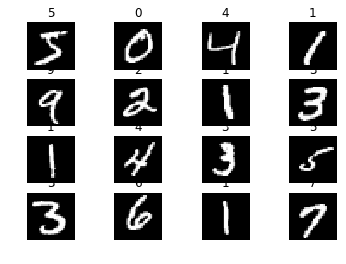

In [3]:
X_train, Y_train = trainData
X_task, Y_task = taskData
showMNISTData(X_train[0:16], Y_train[0:16])

## Create the model

In [12]:
X = uvar.BaseVar(np.reshape(X_train[0:1000]/255, (-1,1,28,28)))
Y = uvar.BaseVar(Y_train[0:1000])

# class NNSpider(nn.Empty):
#     def forward(self,x):
#         print(x.data.shape)
#         return x

model = nn.Serial(
    nn.Conv2d(1,2,(7,7)),
    nn.ReLU(),
    nn.Conv2d(2,1,(3,3)),
    nn.ReLU(),
    nn.Reshape(-1, 20*20),
    nn.Linear(20*20, 100),
    nn.ReLU(),
    nn.Linear(100,10)
)

model.load("ConvMNIST.model")

optim = Adam(model.parameters(), lr=1e-2)


## Train The model

runing 0 loss 151.855419348471


/home/aliy/Tools/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


runing 10 loss 8.112235003047129
runing 20 loss 4.979894659319101


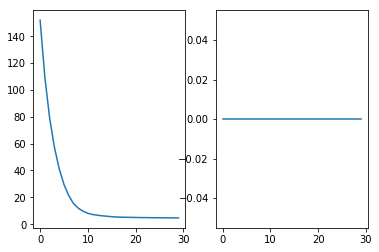

In [13]:
loss_hist = []
accu_hist = []
# accx = uvar.BaseVar(np.reshape(X_train[1000:1010]/255, (-1,1,28,28)))[0:100]

# %debug
# optim = Adam(model.parameters(), lr=1e-4)
for i in range(30):
    loss = 0
    for x, y in getBatch(X, Y, 500):
        out = model.forward(x)
        loss += softMax(out,y)
        model.backward(out)
        optim.step()
    if i % 10 == 0:
        print("runing",i, "loss", loss)
    loss_hist.append(loss)

plt.plot(loss_hist)
plt.show()

## The accuricy

In [14]:
model.save("ConvMNIST.model")

BaseVar
Data [6 7 1 7 7 7 9 7 7 7 7 7]
Grid None

[5 7 1 7 1 1 6 3 0 2 9 3]
0.25


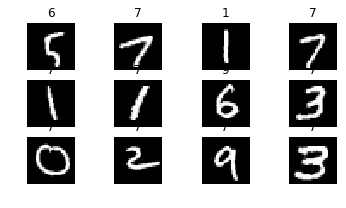

In [15]:
# accx = uvar.BaseVar(np.reshape(X_train[1000:1012]/255, (-1,1,28,28)))
accx = uvar.BaseVar(np.reshape(X_train[100:112]/255, (-1,1,28,28)))
acco = model.forward(accx)
accy = acco.argmax(axis=1)
print(accy[0:20])
print(Y_train[100:112][0:20])
acc = np.mean(accy.data == Y_train[100:112])
print(acc)
showMNISTData(np.reshape(accx.data, (-1,28,28)), accy.data)